In [2]:
import numpy as np
from collections import Counter

class KNN_featureselection:
    def __init__(self, data, k=1):
        self.k = k # User can input a K
        self.data = self.scale(data) # Always scale the features

    def scale(self, data):
        labels = data[:, 0].reshape(-1, 1)
        features = data[:, 1:]
        means = np.mean(features, axis=0)
        stds = np.std(features, axis=0)
        stds[stds == 0] = 1
        scaled = (features - means) / stds #Scale features to mean0 and variance 1
        return np.hstack((labels, scaled))

    #def euclidean_distance(self, x, y): #too slow
    #    return np.sqrt(np.sum((x - y) ** 2))

    def nofeature(self):
        labels, counts = np.unique(self.data[:, 0], return_counts=True) #default rate
        return np.max(counts) / len(self.data)

    def leave_one_out_knn(self, data, feature_indices):
        X = data[:, feature_indices].astype(np.float32) #features
        y = data[:, 0] #labels
        n = len(data)
        correct = 0
    
        for i in range(n):
            test_x = X[i] #leave one out as the test instance
            test_y = y[i]
    
            train_x = np.delete(X, i, axis=0) #other instance are training data
            train_y = np.delete(y, i, axis=0)
              
            distances = np.linalg.norm(train_x - test_x, axis=1)  #compute distances in vectorized way
            
            k_indices = np.argpartition(distances, self.k)[:self.k]  #indices of the k smallest distances
            k_labels = train_y[k_indices]
    
            predicted = Counter(k_labels).most_common(1)[0][0]   #majority vote
     
            if predicted == test_y:
                correct += 1
    
        return correct / n

        
def forward_selection(self):
    total_features = self.data.shape[1] - 1  # total number of features
    current_features = []  # currently selected features
    best_overall_features = []  # best feature subset so far
    best_overall_accuracy = 0.0  # best accuracy so far

    base_accuracy = self.nofeature()  # default rate
    history = [(0, [], base_accuracy)]
    print("\nForward selection.")
    print(f" No features with {base_accuracy:.4f}")

    for i in range(total_features): 
        feature_to_add = None
        best_accuracy_now = 0.0  # best accuracy in this round

        for candidate in range(1, total_features + 1):  # try adding each unselected feature
            if candidate not in current_features:
                temp_features = current_features + [candidate]
                accuracy = self.leave_one_out_knn(self.data, temp_features)
                print(f" Test features {temp_features}, leave-one-out CV accuracy = {accuracy:.4f}")

                if accuracy > best_accuracy_now:  # update if this candidate gives better accuracy
                    best_accuracy_now = accuracy
                    feature_to_add = candidate

        if feature_to_add is not None:
            current_features.append(feature_to_add)  # ddd the best new feature 
            print(f"Add feature {feature_to_add} to {current_features} with accuracy: {best_accuracy_now:.4f}")

            if best_accuracy_now > best_overall_accuracy:
                best_overall_accuracy = best_accuracy_now
                best_overall_features = current_features.copy()

        history.append((i + 1, current_features.copy(), best_accuracy_now, feature_to_add)) #save trace in history

    print(f" Best feature subset: {best_overall_features} with accuracy: {best_overall_accuracy:.4f}")
    return best_overall_features, best_overall_accuracy, history


def backward_selection(self):
    total_features = self.data.shape[1] - 1
    current_features = list(range(1, total_features + 1))  #start with all features

    history = []
    print("\nBackward elimination.")

    best_overall_accuracy = self.leave_one_out_knn(self.data, current_features)
    best_overall_features = current_features.copy()

    print(f" Initial full feature set {current_features}, leave-one-out accuracy = {best_overall_accuracy:.4f}")
    history.append((1, current_features.copy(), best_overall_accuracy))

    step = 1
    while len(current_features) > 1:  
        feature_to_remove = None
        best_accuracy_now = 0.0

        for candidate in current_features:  #  try removing each feature
            temp_features = current_features.copy()
            temp_features.remove(candidate)
            accuracy = self.leave_one_out_knn(self.data, temp_features)
            print(f" Test removing {candidate} from {temp_features}, leave-one-out CV accuracy = {accuracy:.4f}")

            if accuracy > best_accuracy_now:  # update if removal improves accuracy
                best_accuracy_now = accuracy
                feature_to_remove = candidate

        if feature_to_remove is not None:
            current_features.remove(feature_to_remove)  # remove the worst feature
            print(f"Remove feature {feature_to_remove} from {current_features} with accuracy: {best_accuracy_now:.4f}")

            if best_accuracy_now > best_overall_accuracy:
                best_overall_accuracy = best_accuracy_now
                best_overall_features = current_features.copy()

            step += 1
           
            history.append((step, current_features.copy(), best_accuracy_now, feature_to_remove)) #save trace in history
        else:
            print("No feature removal improved accuracy.")
            break

    base_accuracy = self.nofeature()
    history.append((step + 1, [], base_accuracy))
    print(f" No features with accuracy: {base_accuracy:.4f}")

    print(f"Best feature subset: {best_overall_features} with accuracy: {best_overall_accuracy:.4f}")
    return best_overall_features, best_overall_accuracy, history



## K=1

In [133]:
small = np.loadtxt('/rhome/ymu015/bigdata/cs205/CS205_small_Data__49.txt')

k = int(input("Enter value of k for KNN: " )) #let user decide k

selector = KNN_featureselection(small, k=k) #define selector

import time
start_forward = time.time()
forward_features, forward_acc, forward_hist = selector.forward_selection() 
end_forward = time.time()
print(f"Forward selection took {end_forward - start_forward:.2f} seconds.")

start_backward = time.time()
backward_features, backward_acc, backward_hist = selector.backward_selection()
end_backward = time.time()
print(f"Backward selection took {end_backward - start_backward:.2f} seconds.")

Enter value of k for KNN:  1



Forward selection.
 No features with 0.7820
 Test features [1], leave-one-out CV accuracy = 0.6640
 Test features [2], leave-one-out CV accuracy = 0.8340
 Test features [3], leave-one-out CV accuracy = 0.6460
 Test features [4], leave-one-out CV accuracy = 0.6640
 Test features [5], leave-one-out CV accuracy = 0.6540
 Test features [6], leave-one-out CV accuracy = 0.6480
 Test features [7], leave-one-out CV accuracy = 0.6640
 Test features [8], leave-one-out CV accuracy = 0.6420
 Test features [9], leave-one-out CV accuracy = 0.6520
 Test features [10], leave-one-out CV accuracy = 0.6720
 Test features [11], leave-one-out CV accuracy = 0.7060
 Test features [12], leave-one-out CV accuracy = 0.6760
Add feature 2 to [2] with accuracy: 0.8340
 Test features [2, 1], leave-one-out CV accuracy = 0.8160
 Test features [2, 3], leave-one-out CV accuracy = 0.8220
 Test features [2, 4], leave-one-out CV accuracy = 0.8220
 Test features [2, 5], leave-one-out CV accuracy = 0.8180
 Test features [2

## K=3

In [134]:
selector = KNN_featureselection(small, k=3) #define selector

import time
start_forward = time.time()
forward_features, forward_acc, forward_hist = selector.forward_selection() 
end_forward = time.time()
print(f"Forward selection took {end_forward - start_forward:.2f} seconds.")

start_backward = time.time()
backward_features, backward_acc, backward_hist = selector.backward_selection()
end_backward = time.time()
print(f"Backward selection took {end_backward - start_backward:.2f} seconds.")


Forward selection.
 No features with 0.7820
 Test features [1], leave-one-out CV accuracy = 0.7160
 Test features [2], leave-one-out CV accuracy = 0.8360
 Test features [3], leave-one-out CV accuracy = 0.6960
 Test features [4], leave-one-out CV accuracy = 0.7140
 Test features [5], leave-one-out CV accuracy = 0.7200
 Test features [6], leave-one-out CV accuracy = 0.7180
 Test features [7], leave-one-out CV accuracy = 0.7360
 Test features [8], leave-one-out CV accuracy = 0.7100
 Test features [9], leave-one-out CV accuracy = 0.6960
 Test features [10], leave-one-out CV accuracy = 0.7140
 Test features [11], leave-one-out CV accuracy = 0.7260
 Test features [12], leave-one-out CV accuracy = 0.7080
Add feature 2 to [2] with accuracy: 0.8360
 Test features [2, 1], leave-one-out CV accuracy = 0.8400
 Test features [2, 3], leave-one-out CV accuracy = 0.8180
 Test features [2, 4], leave-one-out CV accuracy = 0.8560
 Test features [2, 5], leave-one-out CV accuracy = 0.8440
 Test features [2

## K=5

In [135]:
selector = KNN_featureselection(small, k=5) #define selector

import time
start_forward = time.time()
forward_features, forward_acc, forward_hist = selector.forward_selection() 
end_forward = time.time()
print(f"Forward selection took {end_forward - start_forward:.2f} seconds.")

start_backward = time.time()
backward_features, backward_acc, backward_hist = selector.backward_selection()
end_backward = time.time()
print(f"Backward selection took {end_backward - start_backward:.2f} seconds.")


Forward selection.
 No features with 0.7820
 Test features [1], leave-one-out CV accuracy = 0.7600
 Test features [2], leave-one-out CV accuracy = 0.8420
 Test features [3], leave-one-out CV accuracy = 0.7120
 Test features [4], leave-one-out CV accuracy = 0.7140
 Test features [5], leave-one-out CV accuracy = 0.7480
 Test features [6], leave-one-out CV accuracy = 0.7320
 Test features [7], leave-one-out CV accuracy = 0.7620
 Test features [8], leave-one-out CV accuracy = 0.7480
 Test features [9], leave-one-out CV accuracy = 0.7360
 Test features [10], leave-one-out CV accuracy = 0.7280
 Test features [11], leave-one-out CV accuracy = 0.7540
 Test features [12], leave-one-out CV accuracy = 0.7360
Add feature 2 to [2] with accuracy: 0.8420
 Test features [2, 1], leave-one-out CV accuracy = 0.8420
 Test features [2, 3], leave-one-out CV accuracy = 0.8300
 Test features [2, 4], leave-one-out CV accuracy = 0.8640
 Test features [2, 5], leave-one-out CV accuracy = 0.8620
 Test features [2

## K=7

In [136]:
selector = KNN_featureselection(small, k=7) #define selector

import time
start_forward = time.time()
forward_features, forward_acc, forward_hist = selector.forward_selection() 
end_forward = time.time()
print(f"Forward selection took {end_forward - start_forward:.2f} seconds.")

start_backward = time.time()
backward_features, backward_acc, backward_hist = selector.backward_selection()
end_backward = time.time()
print(f"Backward selection took {end_backward - start_backward:.2f} seconds.")


Forward selection.
 No features with 0.7820
 Test features [1], leave-one-out CV accuracy = 0.7720
 Test features [2], leave-one-out CV accuracy = 0.8400
 Test features [3], leave-one-out CV accuracy = 0.7440
 Test features [4], leave-one-out CV accuracy = 0.7400
 Test features [5], leave-one-out CV accuracy = 0.7500
 Test features [6], leave-one-out CV accuracy = 0.7640
 Test features [7], leave-one-out CV accuracy = 0.7600
 Test features [8], leave-one-out CV accuracy = 0.7660
 Test features [9], leave-one-out CV accuracy = 0.7640
 Test features [10], leave-one-out CV accuracy = 0.7620
 Test features [11], leave-one-out CV accuracy = 0.7560
 Test features [12], leave-one-out CV accuracy = 0.7540
Add feature 2 to [2] with accuracy: 0.8400
 Test features [2, 1], leave-one-out CV accuracy = 0.8520
 Test features [2, 3], leave-one-out CV accuracy = 0.8380
 Test features [2, 4], leave-one-out CV accuracy = 0.8380
 Test features [2, 5], leave-one-out CV accuracy = 0.8660
 Test features [2

## K=9

In [137]:
selector = KNN_featureselection(small, k=9) #define selector

import time
start_forward = time.time()
forward_features, forward_acc, forward_hist = selector.forward_selection() 
end_forward = time.time()
print(f"Forward selection took {end_forward - start_forward:.2f} seconds.")

start_backward = time.time()
backward_features, backward_acc, backward_hist = selector.backward_selection()
end_backward = time.time()
print(f"Backward selection took {end_backward - start_backward:.2f} seconds.")


Forward selection.
 No features with 0.7820
 Test features [1], leave-one-out CV accuracy = 0.7820
 Test features [2], leave-one-out CV accuracy = 0.8400
 Test features [3], leave-one-out CV accuracy = 0.7720
 Test features [4], leave-one-out CV accuracy = 0.7620
 Test features [5], leave-one-out CV accuracy = 0.7540
 Test features [6], leave-one-out CV accuracy = 0.7820
 Test features [7], leave-one-out CV accuracy = 0.7700
 Test features [8], leave-one-out CV accuracy = 0.7680
 Test features [9], leave-one-out CV accuracy = 0.7820
 Test features [10], leave-one-out CV accuracy = 0.7700
 Test features [11], leave-one-out CV accuracy = 0.7720
 Test features [12], leave-one-out CV accuracy = 0.7540
Add feature 2 to [2] with accuracy: 0.8400
 Test features [2, 1], leave-one-out CV accuracy = 0.8620
 Test features [2, 3], leave-one-out CV accuracy = 0.8380
 Test features [2, 4], leave-one-out CV accuracy = 0.8440
 Test features [2, 5], leave-one-out CV accuracy = 0.8620
 Test features [2

## K=1 plot

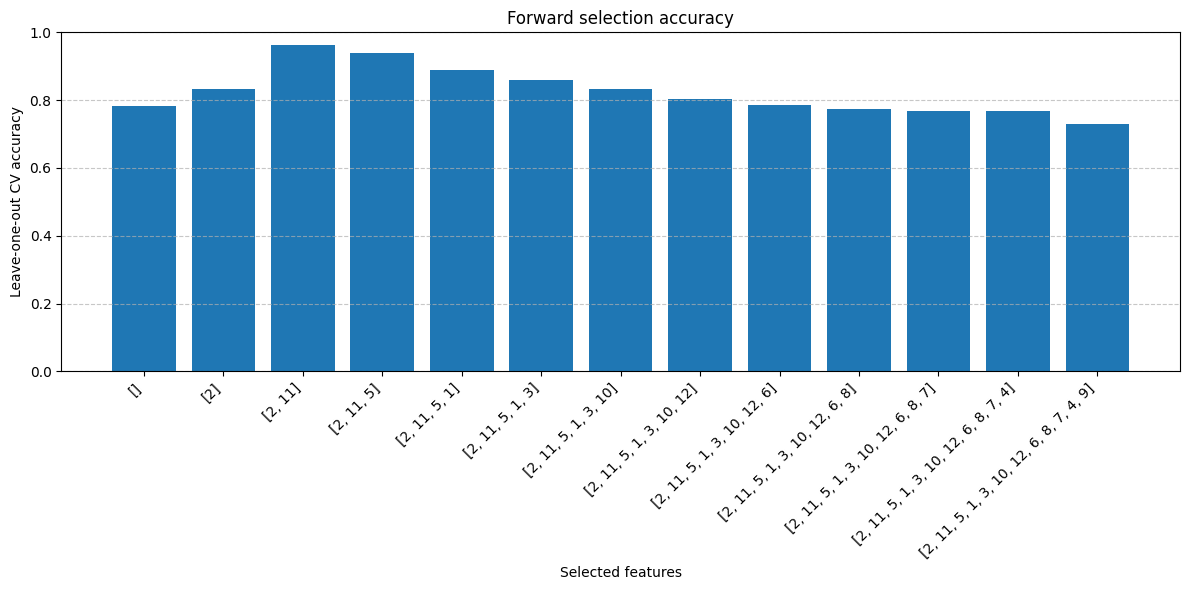

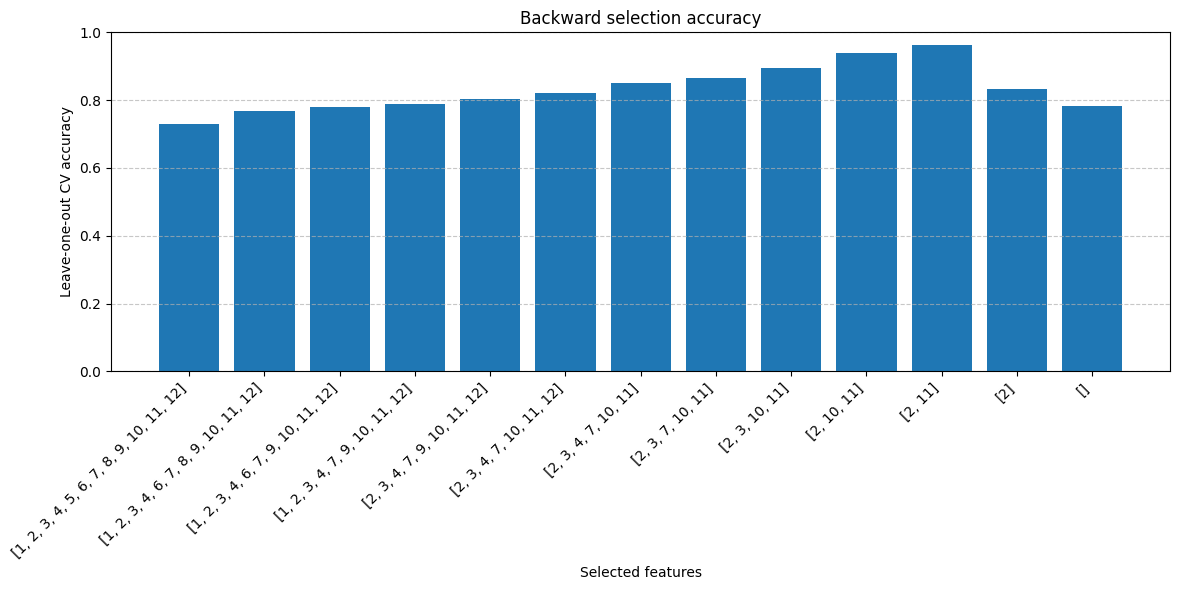

In [114]:
import matplotlib.pyplot as plt

forward_hist[0] = (0, [], np.float64(0.782), 'no feature')

feature_sets = [str(features) for _, features, _, _ in forward_hist] #extract feature sets
accuracies = [acc for _, _, acc, _ in forward_hist] #extract accuracies

# Plot forward selection trace
plt.figure(figsize=(12, 6))
plt.bar(feature_sets, accuracies)

plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.0)
plt.xlabel("Selected features")
plt.ylabel("Leave-one-out CV accuracy")
plt.title("Forward selection accuracy")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Plot backward elimination trace
backward_hist[0] = (1, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 0.73, 'All feature')
backward_hist[len(backward_hist)-1] = (13, [], np.float64(0.782), 'no feature')

feature_sets = [str(features) for _, features, _, _ in backward_hist]
accuracies = [acc for _, _, acc, _ in backward_hist]

plt.figure(figsize=(12, 6))
plt.bar(feature_sets, accuracies)

plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.0)
plt.xlabel("Selected features")
plt.ylabel("Leave-one-out CV accuracy")
plt.title("Backward selection accuracy")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## K=7 Plot

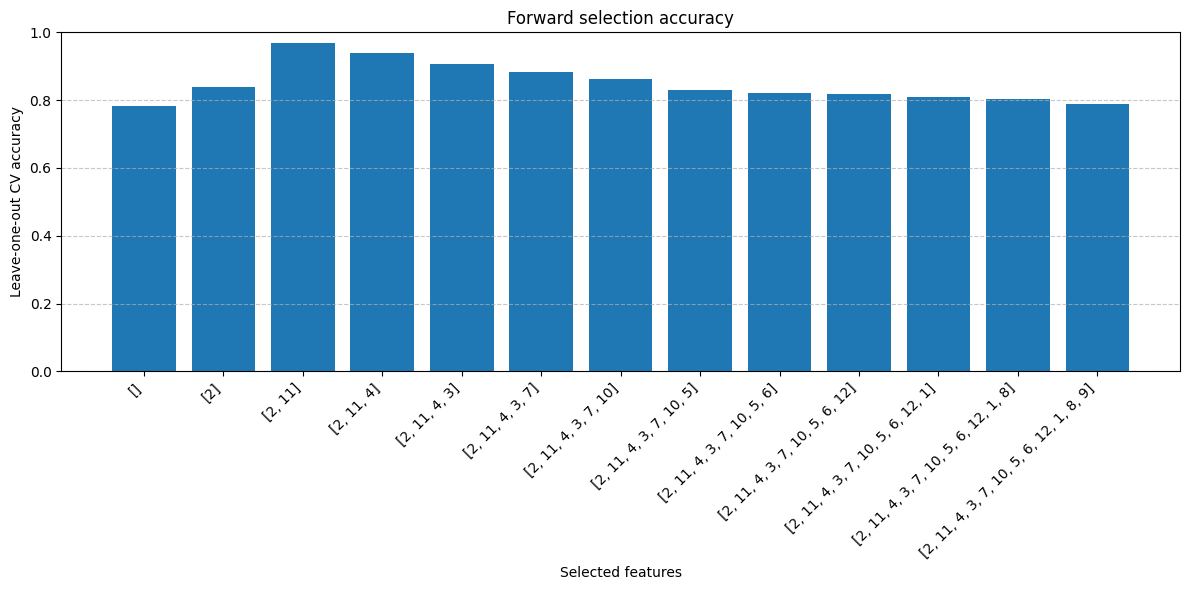

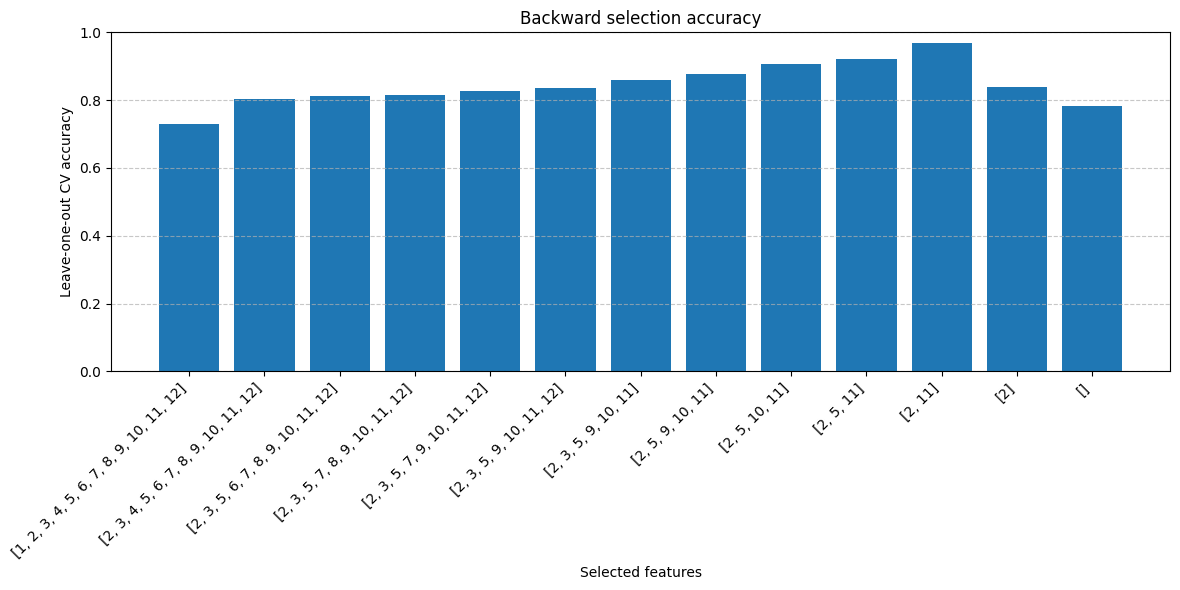

In [123]:
forward_hist[0] = (0, [], np.float64(0.782), 'no feature')

feature_sets = [str(features) for _, features, _, _ in forward_hist] #extract feature sets
accuracies = [acc for _, _, acc, _ in forward_hist] #extract accuracies

# Plot forward selection trace
plt.figure(figsize=(12, 6))
plt.bar(feature_sets, accuracies)

plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.0)
plt.xlabel("Selected features")
plt.ylabel("Leave-one-out CV accuracy")
plt.title("Forward selection accuracy")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Plot backward elimination trace
backward_hist[0] = (1, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 0.73, 'All feature')
backward_hist[len(backward_hist)-1] = (13, [], np.float64(0.782), 'no feature')

feature_sets = [str(features) for _, features, _, _ in backward_hist]
accuracies = [acc for _, _, acc, _ in backward_hist]

plt.figure(figsize=(12, 6))
plt.bar(feature_sets, accuracies)

plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.0)
plt.xlabel("Selected features")
plt.ylabel("Leave-one-out CV accuracy")
plt.title("Backward selection accuracy")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Large data

In [ ]:
large = np.loadtxt('/rhome/ymu015/bigdata/cs205/CS205_large_Data__20.txt')

k = int(input("Enter value of k for KNN: " )) #let user decide k

selector = KNN_featureselection(large, k=k) #define selector

import time
start_forward = time.time()
forward_features, forward_acc, forward_hist = selector.forward_selection() 
end_forward = time.time()


print(f"Forward selection took {end_forward - start_forward:.2f} seconds.")

start_backward = time.time()
backward_features, backward_acc, backward_hist = selector.backward_selection()
end_backward = time.time()
print(f"Backward selection took {end_backward - start_backward:.2f} seconds.")

## I used cluster to run the large datas, so the results are not showing in this notebook.

In [81]:
import ast

# Load the results history
with open('results/forward_history_k1.txt', 'r') as file:
    forward_hist1 = [line.strip() for line in file]

# Convert string lines to actual Python tuples
forward_hist = [ast.literal_eval(line.replace("np.float64", "")) for line in forward_hist1]

In [82]:
for i in range(8, 47):
    step, _, acc = forward_hist[i]
    forward_hist[i] = (step, '...', acc)
step, _, acc = forward_hist[47]
forward_hist[47] = (step, [4, 24, 11, '...', 15, 44, 29], acc)
step, _, acc = forward_hist[47]
forward_hist[48] = (step, [4, 24, 11, '...', 44, 29, 27], acc)
step, _, acc = forward_hist[49]
forward_hist[49] = (step, [4, 24, 11, '...', 29, 27, 13], acc) 
step, _, acc = forward_hist[50]
forward_hist[50] = (step, 'All features', acc)

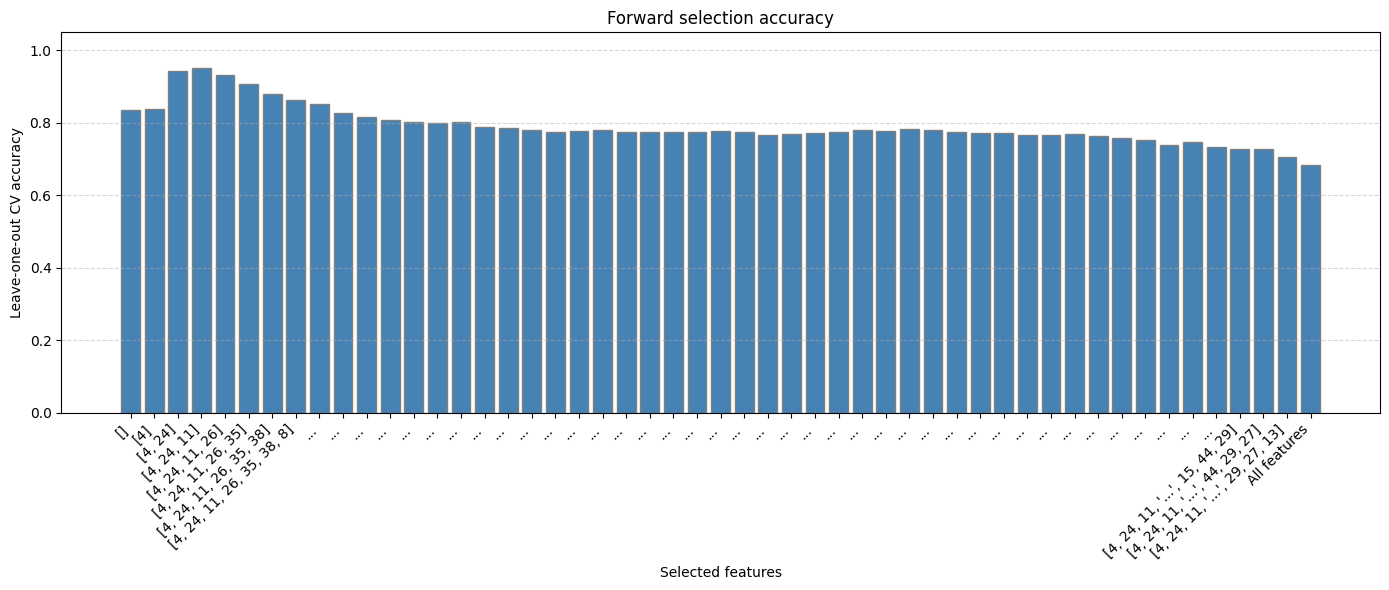

In [83]:
labels = []
accuracies = []
colors = []

for _, features, acc in forward_hist:
    if features == ['...']:
        labels.append("")           # skip label
        accuracies.append(acc)        
        colors.append("steelblue")     
    else:
        labels.append(str(features))
        accuracies.append(acc)
        colors.append("steelblue") 

plt.figure(figsize=(14, 6))
bars = plt.bar(range(len(accuracies)), accuracies, color=colors, edgecolor="gray")

plt.xticks(range(len(labels)), labels, rotation=45, ha='right')
plt.xlabel('Selected features')
plt.ylabel("Leave-one-out CV accuracy")
plt.title("Forward selection accuracy")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [56]:
# Load the results history
with open('results/backward_history_k1.txt', 'r') as file:
    backward_hist1 = [line.strip() for line in file]

# Convert string lines to actual Python tuples
backward_hist = [ast.literal_eval(line.replace("np.float64", "")) for line in backward_hist1]

In [65]:
for i in range(4, 42):
    step, _, acc = forward_hist[i]
    backward_hist[i] = (step, '...', acc)
step, _, acc = backward_hist[0]
backward_hist[0] = (step, 'All features', acc)
step, _, acc = backward_hist[1]
backward_hist[1] = (step, 'Remove feature 11', acc) 
step, _, acc = backward_hist[2]
backward_hist[2] = (step, 'Remove feature 19', acc)
step, _, acc = backward_hist[3]
backward_hist[3] = (step, 'Remove feature 1', acc)

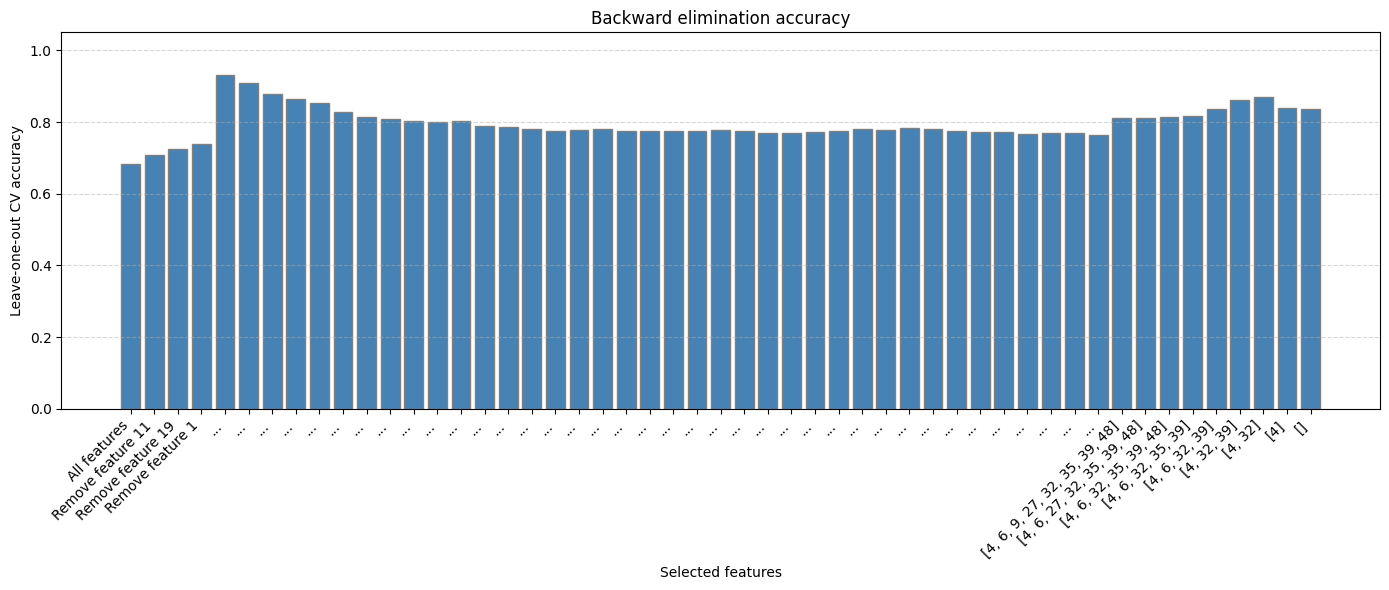

In [72]:
labels = []
accuracies = []
colors = []

for _, features, acc in backward_hist:
    if features == ['...']:
        labels.append("")           # skip label
        accuracies.append(acc)        
        colors.append("steelblue")     
    else:
        labels.append(str(features))
        accuracies.append(acc)
        colors.append("steelblue") 

plt.figure(figsize=(14, 6))
bars = plt.bar(range(len(accuracies)), accuracies, color=colors, edgecolor="gray")

plt.xticks(range(len(labels)), labels, rotation=45, ha='right')
plt.xlabel('Selected features')
plt.ylabel("Leave-one-out CV accuracy")
plt.title("Backward elimination accuracy")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [125]:
large = np.loadtxt('/rhome/ymu015/bigdata/cs205/CS205_large_Data__20.txt')
large.shape


(1000, 51)

In [3]:
small = np.loadtxt('/rhome/ymu015/bigdata/cs205/CS205_small_Data__49.txt')
small.shape

(500, 13)